In [23]:
#Exploring Probabilistically modeled stock data with LSTM
# data from https://finance.yahoo.com/quote/AAPL/history?period1=1574035200&period2=1668816000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('AAPL.csv')[['Date', 'High', 'Low']]
#ensuring datatypes
df['High'], df['Low'] = df['High'].astype(float), df['Low'].astype(float)
df['Date']= pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    503 non-null    datetime64[ns]
 1   High    503 non-null    float64       
 2   Low     503 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 11.9 KB


(array([18628., 18718., 18809., 18901., 18993., 19083., 19174., 19266.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10')])

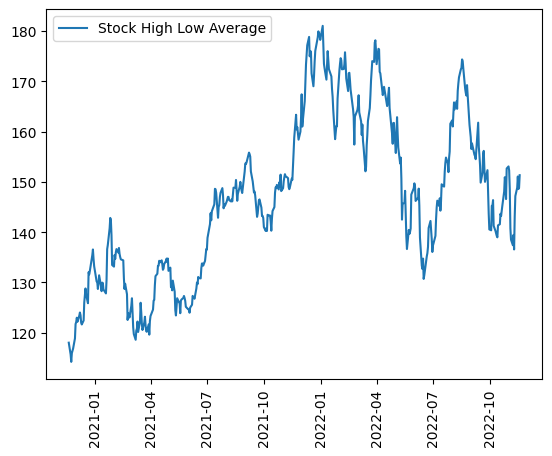

In [25]:
#average of high and low
import matplotlib.pyplot
stockMeans = []

for index, row in df.iterrows():
    stockMeans.append((row['High'] + row['Low'])/2)

#showing averages before splitting
df['HighLowMean'] = stockMeans
plt.plot(df['Date'], stockMeans)
plt.legend(['Stock High Low Average'])
plt.xticks(rotation = 90)

In [26]:
#Assuming a random distribution between high and low each day
#sythesizing possible worlds and associating them with probabilities
Low2 = []
Low14 = []
Low34 = []
High34 = []
High14 = []
High2 = []

for index, row in df.iterrows():
    part = (row['High'] - row['Low'])/6
    Low2.append(((row['Low'] + part)+(row['Low']))/2)
    Low14.append(((row['Low'] + 2*part)+(row['Low'] + part))/2)
    Low34.append(((row['Low'] + 3*part)+(row['Low'] + 2*part))/2)
    High34.append(((row['Low'] + 4*part)+(row['Low'] + 3*part))/2)
    High14.append(((row['Low'] + 5*part)+(row['Low'] + 4*part))/2)
    High2.append(((row['Low'] + 6*part)+(row['Low'] + 5*part))/2)

df['Low2'] = Low2
df['Low14'] = Low14
df['Low34'] = Low34
df['High34'] = High34
df['High14'] = High14
df['High2'] = High2

df

,Date,High,Low,HighLowMean,Low2,Low14,Low34,High34,High14,High2
0,2020-11-20,118.769997,117.290001,118.029999,117.413334,117.660000,117.906666,118.153332,118.399998,118.646664
1,2020-11-23,117.620003,113.750000,115.685001,114.072500,114.717501,115.362501,116.007502,116.652502,117.297503
2,2020-11-24,115.849998,112.589996,114.219997,112.861663,113.404997,113.948330,114.491664,115.034998,115.578331
3,2020-11-25,116.750000,115.169998,115.959999,115.301665,115.564999,115.828332,116.091666,116.354999,116.618333
4,2020-11-27,117.489998,116.220001,116.854999,116.325834,116.537500,116.749166,116.960833,117.172499,117.384165
...,...,...,...,...,...,...,...,...,...,...
498,2022-11-14,150.279999,147.429993,148.854996,147.667493,148.142494,148.617496,149.092496,149.567498,150.042499
499,2022-11-15,153.589996,148.559998,151.074997,148.979165,149.817498,150.655831,151.494164,152.332496,153.170830
500,2022-11-16,149.869995,147.289993,148.579994,147.504993,147.934994,148.364994,148.794994,149.224994,149.654995
501,2022-11-17,151.479996,146.149994,148.814995,146.594161,147.482494,148.370828,149.259162,150.147495,151.035829


(array([18628., 18718., 18809., 18901., 18993., 19083., 19174., 19266.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10'),
  Text(18993.0, 0, '2022-01'),
  Text(19083.0, 0, '2022-04'),
  Text(19174.0, 0, '2022-07'),
  Text(19266.0, 0, '2022-10')])

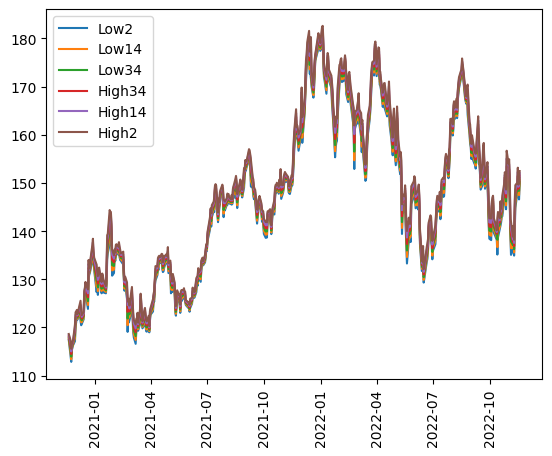

In [27]:
#showing overall trend of the data
#each line is a possible world

x = df['Date']
y1 = df['Low2']
y2 = df['Low14']
y3 = df['Low34']
y4 = df['High34']
y5 = df['High14']
y6 = df['High2']

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.plot(x, y5)
plt.plot(x, y6)
plt.legend(['Low2', 'Low14', 'Low34', 'High34', 'High14', 'High2'])
plt.xticks(rotation = 90)

(array([19250., 19266., 19280., 19297., 19311.]),
 [Text(19250.0, 0, '2022-09-15'),
  Text(19266.0, 0, '2022-10-01'),
  Text(19280.0, 0, '2022-10-15'),
  Text(19297.0, 0, '2022-11-01'),
  Text(19311.0, 0, '2022-11-15')])

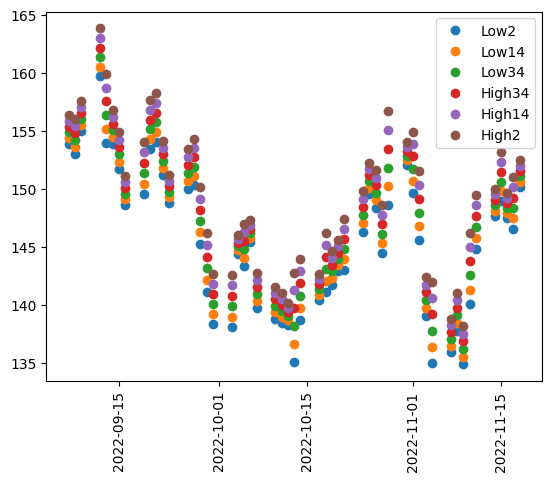

In [45]:
#zooming in to show character
x = df['Date'][450:]
y1 = df['Low2'][450:]
y2 = df['Low14'][450:]
y3 = df['Low34'][450:]
y4 = df['High34'][450:]
y5 = df['High14'][450:]
y6 = df['High2'][450:]

plt.plot(x, y1, 'o')
plt.plot(x, y2, 'o')
plt.plot(x, y3, 'o')
plt.plot(x, y4, 'o')
plt.plot(x, y5, 'o')
plt.plot(x, y6, 'o')
plt.legend(['Low2', 'Low14', 'Low34', 'High34', 'High14', 'High2'])
plt.xticks(rotation = 90)

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#convert to array and shape appropriately
#scale values from 0 to 1 to work better with LSTM model
ds1 = df['Low2'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0,1))
ds1 = scaler.fit_transform(ds1)
ds1.shape

(503, 1)

In [30]:
ds1_train_size = int(len(ds1) * .8)
ds1_test_size = len(ds1) - ds1_train_size
ds1_train, ds1_test = ds1[0:ds1_train_size,:], ds1[ds1_train_size:len(ds1),:]

In [31]:
#segmenting input/training portion from output/value guesses
def toWindow(ds, windowSize) :
    x = []
    y = []

    for i in range(len(ds)-windowSize-1):
        window = ds[i:(i+windowSize), 0]
        x.append(window)
        y.append(ds[i+windowSize, 0])
    return np.array(x), np.array(y)

ds1trainX, ds1trainY = toWindow(ds1_train, 5)
ds1testX, ds1testY = toWindow(ds1_test, 5)
ds1trainX.shape, ds1trainY.shape, ds1testX.shape, ds1testY.shape

((396, 5), (396,), (95, 5), (95,))

In [32]:
ds1trainX = np.reshape(ds1trainX, (ds1trainX.shape[0], 1, ds1trainX.shape[1]))
ds1testX = np.reshape(ds1testX, (ds1testX.shape[0], 1, ds1testX.shape[1]))

ds1model = Sequential()
ds1model.add(LSTM(64, input_shape=(None,5)))
ds1model.add(Dense(32, activation='relu'))
ds1model.add(Dense(1))
ds1model.compile(loss='mean_squared_error', optimizer='adam')
ds1model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                17920     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________


In [33]:
ds1model.fit(ds1trainX, ds1trainY, validation_data=(ds1testX, ds1testY), epochs=100)

ds1trainPredict = ds1model.predict(ds1trainX)
ds1testPredict = ds1model.predict(ds1testX)

Epoch 1/100
13/13 [==============================] - 1s 23ms/step - loss: 0.1971 - val_loss: 0.1412
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0663 - val_loss: 0.0220
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0129 - val_loss: 0.0089
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0116 - val_loss: 0.0050
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.0057
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.0045
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0043
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 0.0041
Epoch 11

13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 84/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 85/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0019
Epoch 86/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 87/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 88/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 89/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 90/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0019
Epoch 91/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 92/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 93/100


In [34]:
ds1trainPredict = scaler.inverse_transform(ds1trainPredict)
ds1trainY = scaler.inverse_transform([ds1trainY])
ds1testPredict = scaler.inverse_transform(ds1testPredict)
ds1testY = scaler.inverse_transform([ds1testY])
ds1 = scaler.inverse_transform(ds1)

In [35]:
import math
ds1trainScore = math.sqrt(mean_squared_error(ds1trainY[0], ds1trainPredict[:,0]))

ds1testScore = math.sqrt(mean_squared_error(ds1testY[0], ds1testPredict[:,0]))

print(ds1trainScore)
print(ds1testScore)

2.4485483885018464
2.8014343471038323


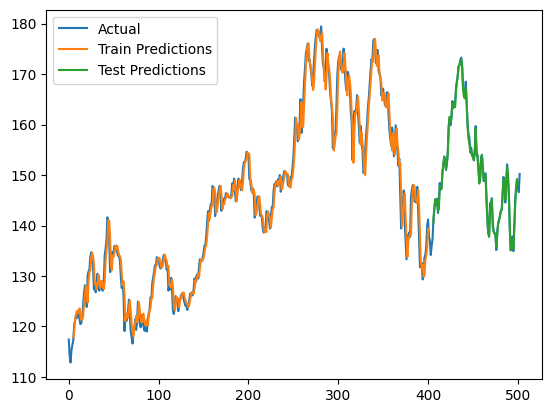

In [36]:
#adjust for missing beginning guessing values
ds1trainPredictPlot = np.empty_like(ds1)
ds1trainPredictPlot[:,:] = np.nan
ds1trainPredictPlot[5:len(ds1trainPredict)+5, :] = ds1trainPredict

ds1testPredictPlot = np.empty_like(ds1)
ds1testPredictPlot[:,:] = np.nan
ds1testPredictPlot[len(ds1trainPredict) + (10): len(ds1) -2, :] = ds1testPredict

plt.plot(ds1)
plt.plot(ds1trainPredictPlot)
plt.plot(ds1testPredictPlot)
plt.legend(['Actual', 'Train Predictions', 'Test Predictions'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 64)                17920     
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 23ms/step - loss: 0.1333 - val_loss: 0.0639
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0241 - val_loss: 0.0043
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 0.0054
Epoch 4/100
13/1

Epoch 75/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 76/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 77/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 78/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 79/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 80/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 81/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 82/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 83/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 84/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0016


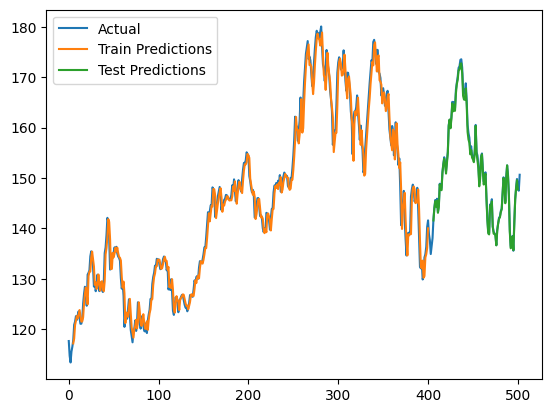

In [37]:
#second set with 14% probability
ds2 = df['Low14'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0,1))
ds2 = scaler.fit_transform(ds2)

ds2_train_size = int(len(ds2) * .8)
ds2_test_size = len(ds2) - ds2_train_size
ds2_train, ds2_test = ds2[0:ds2_train_size,:], ds2[ds2_train_size:len(ds2),:]

ds2trainX, ds2trainY = toWindow(ds2_train, 5)
ds2testX, ds2testY = toWindow(ds2_test, 5)

ds2trainX = np.reshape(ds2trainX, (ds2trainX.shape[0], 1, ds2trainX.shape[1]))
ds2testX = np.reshape(ds2testX, (ds2testX.shape[0], 1, ds2testX.shape[1]))

ds2model = Sequential()
ds2model.add(LSTM(64, input_shape=(None,5)))
ds2model.add(Dense(32, activation='relu'))
ds2model.add(Dense(1))
ds2model.compile(loss='mean_squared_error', optimizer='adam')
ds2model.summary()

ds2model.fit(ds2trainX, ds2trainY, validation_data=(ds2testX, ds2testY), epochs=100)

ds2trainPredict = ds2model.predict(ds2trainX)
ds2testPredict = ds2model.predict(ds2testX)

ds2trainPredict = scaler.inverse_transform(ds2trainPredict)
ds2trainY = scaler.inverse_transform([ds2trainY])
ds2testPredict = scaler.inverse_transform(ds2testPredict)
ds2testY = scaler.inverse_transform([ds2testY])
ds2 = scaler.inverse_transform(ds2)

ds2trainScore = math.sqrt(mean_squared_error(ds2trainY[0], ds2trainPredict[:,0]))

ds2testScore = math.sqrt(mean_squared_error(ds2testY[0], ds2testPredict[:,0]))

print(ds2trainScore)
print(ds2testScore)

ds2trainPredictPlot = np.empty_like(ds2)
ds2trainPredictPlot[:,:] = np.nan
ds2trainPredictPlot[5:len(ds2trainPredict)+5, :] = ds2trainPredict

ds2testPredictPlot = np.empty_like(ds2)
ds2testPredictPlot[:,:] = np.nan
ds2testPredictPlot[len(ds2trainPredict) + (10): len(ds2) -2, :] = ds2testPredict

plt.plot(ds2)
plt.plot(ds2trainPredictPlot)
plt.plot(ds2testPredictPlot)
plt.legend(['Actual', 'Train Predictions', 'Test Predictions'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 64)                17920     
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 22ms/step - loss: 0.2361 - val_loss: 0.2057
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1235 - val_loss: 0.0856
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0403 - val_loss: 0.0106
Epoch 4/100
13/1

Epoch 75/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 76/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 77/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 78/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 79/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 80/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 81/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 82/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 83/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 84/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0022


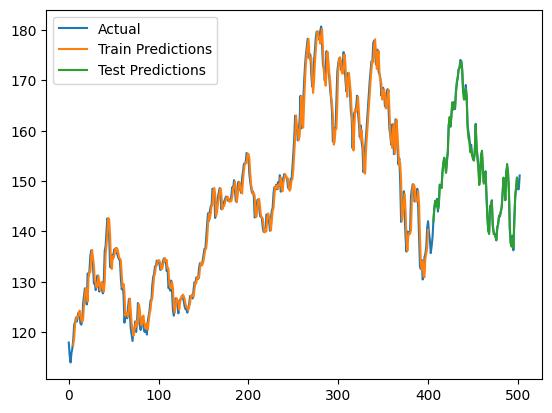

In [38]:
#third set with 34% probability
ds3 = df['Low34'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0,1))
ds3 = scaler.fit_transform(ds3)

ds3_train_size = int(len(ds3) * .8)
ds3_test_size = len(ds3) - ds3_train_size
ds3_train, ds3_test = ds3[0:ds3_train_size,:], ds3[ds3_train_size:len(ds3),:]

ds3trainX, ds3trainY = toWindow(ds3_train, 5)
ds3testX, ds3testY = toWindow(ds3_test, 5)

ds3trainX = np.reshape(ds3trainX, (ds3trainX.shape[0], 1, ds3trainX.shape[1]))
ds3testX = np.reshape(ds3testX, (ds3testX.shape[0], 1, ds3testX.shape[1]))

ds3model = Sequential()
ds3model.add(LSTM(64, input_shape=(None,5)))
ds3model.add(Dense(32, activation='relu'))
ds3model.add(Dense(1))
ds3model.compile(loss='mean_squared_error', optimizer='adam')
ds3model.summary()

ds3model.fit(ds3trainX, ds3trainY, validation_data=(ds3testX, ds3testY), epochs=100)

ds3trainPredict = ds3model.predict(ds3trainX)
ds3testPredict = ds3model.predict(ds3testX)

ds3trainPredict = scaler.inverse_transform(ds3trainPredict)
ds3trainY = scaler.inverse_transform([ds3trainY])
ds3testPredict = scaler.inverse_transform(ds3testPredict)
ds3testY = scaler.inverse_transform([ds3testY])
ds3 = scaler.inverse_transform(ds3)

ds3trainScore = math.sqrt(mean_squared_error(ds3trainY[0], ds3trainPredict[:,0]))

ds3testScore = math.sqrt(mean_squared_error(ds3testY[0], ds3testPredict[:,0]))

print(ds3trainScore)
print(ds3testScore)

ds3trainPredictPlot = np.empty_like(ds3)
ds3trainPredictPlot[:,:] = np.nan
ds3trainPredictPlot[5:len(ds3trainPredict)+5, :] = ds3trainPredict

ds3testPredictPlot = np.empty_like(ds3)
ds3testPredictPlot[:,:] = np.nan
ds3testPredictPlot[len(ds3trainPredict) + (10): len(ds3) -2, :] = ds3testPredict

plt.plot(ds3)
plt.plot(ds3trainPredictPlot)
plt.plot(ds3testPredictPlot)
plt.legend(['Actual', 'Train Predictions', 'Test Predictions'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 64)                17920     
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 23ms/step - loss: 0.1784 - val_loss: 0.1202
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0538 - val_loss: 0.0177
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.0074
Epoch 4/100
13/1

Epoch 75/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 76/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 77/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 78/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 79/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 80/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 81/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 82/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 83/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 84/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0018


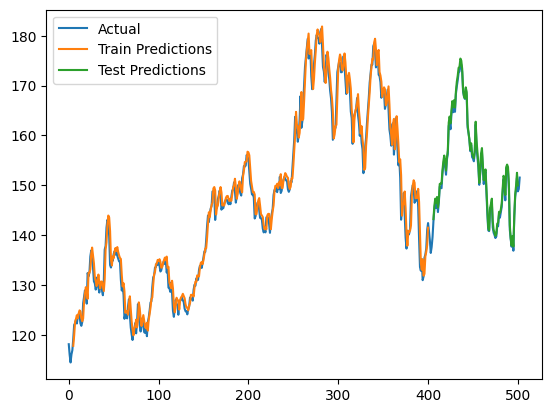

In [39]:
#fourth set with 34% probability
ds4 = df['High34'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0,1))
ds4 = scaler.fit_transform(ds4)

ds4_train_size = int(len(ds4) * .8)
ds4_test_size = len(ds4) - ds4_train_size
ds4_train, ds4_test = ds4[0:ds4_train_size,:], ds4[ds4_train_size:len(ds4),:]

ds4trainX, ds4trainY = toWindow(ds4_train, 5)
ds4testX, ds4testY = toWindow(ds4_test, 5)

ds4trainX = np.reshape(ds4trainX, (ds4trainX.shape[0], 1, ds4trainX.shape[1]))
ds4testX = np.reshape(ds4testX, (ds4testX.shape[0], 1, ds4testX.shape[1]))

ds4model = Sequential()
ds4model.add(LSTM(64, input_shape=(None,5)))
ds4model.add(Dense(32, activation='relu'))
ds4model.add(Dense(1))
ds4model.compile(loss='mean_squared_error', optimizer='adam')
ds4model.summary()

ds4model.fit(ds4trainX, ds4trainY, validation_data=(ds4testX, ds4testY), epochs=100)

ds4trainPredict = ds4model.predict(ds4trainX)
ds4testPredict = ds4model.predict(ds4testX)

ds4trainPredict = scaler.inverse_transform(ds4trainPredict)
ds4trainY = scaler.inverse_transform([ds4trainY])
ds4testPredict = scaler.inverse_transform(ds4testPredict)
ds4testY = scaler.inverse_transform([ds4testY])
ds4 = scaler.inverse_transform(ds4)

ds4trainScore = math.sqrt(mean_squared_error(ds4trainY[0], ds4trainPredict[:,0]))

ds4testScore = math.sqrt(mean_squared_error(ds4testY[0], ds4testPredict[:,0]))

print(ds4trainScore)
print(ds4testScore)

ds4trainPredictPlot = np.empty_like(ds4)
ds4trainPredictPlot[:,:] = np.nan
ds4trainPredictPlot[5:len(ds4trainPredict)+5, :] = ds4trainPredict

ds4testPredictPlot = np.empty_like(ds4)
ds4testPredictPlot[:,:] = np.nan
ds4testPredictPlot[len(ds4trainPredict) + (10): len(ds4) -2, :] = ds4testPredict

plt.plot(ds4)
plt.plot(ds4trainPredictPlot)
plt.plot(ds4testPredictPlot)
plt.legend(['Actual', 'Train Predictions', 'Test Predictions'])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 64)                17920     
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 23ms/step - loss: 0.2351 - val_loss: 0.2090
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1206 - val_loss: 0.0705
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0295 - val_loss: 0.0055
Epoch 4/100
13/

Epoch 75/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 76/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 77/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 78/100
13/13 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 79/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 80/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 81/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 82/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 83/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 84/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0018


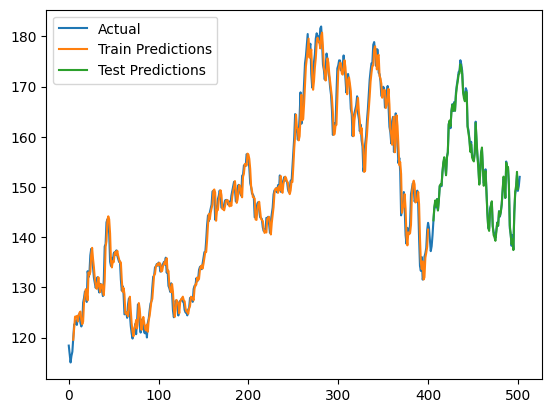

In [40]:
#fifth set with 14% probability
ds5 = df['High14'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0,1))
ds5 = scaler.fit_transform(ds5)

ds5_train_size = int(len(ds5) * .8)
ds5_test_size = len(ds5) - ds5_train_size
ds5_train, ds5_test = ds5[0:ds5_train_size,:], ds5[ds5_train_size:len(ds5),:]

ds5trainX, ds5trainY = toWindow(ds5_train, 5)
ds5testX, ds5testY = toWindow(ds5_test, 5)

ds5trainX = np.reshape(ds5trainX, (ds5trainX.shape[0], 1, ds5trainX.shape[1]))
ds5testX = np.reshape(ds5testX, (ds5testX.shape[0], 1, ds5testX.shape[1]))

ds5model = Sequential()
ds5model.add(LSTM(64, input_shape=(None,5)))
ds5model.add(Dense(32, activation='relu'))
ds5model.add(Dense(1))
ds5model.compile(loss='mean_squared_error', optimizer='adam')
ds5model.summary()

ds5model.fit(ds5trainX, ds5trainY, validation_data=(ds5testX, ds5testY), epochs=100)

ds5trainPredict = ds5model.predict(ds5trainX)
ds5testPredict = ds5model.predict(ds5testX)

ds5trainPredict = scaler.inverse_transform(ds5trainPredict)
ds5trainY = scaler.inverse_transform([ds5trainY])
ds5testPredict = scaler.inverse_transform(ds5testPredict)
ds5testY = scaler.inverse_transform([ds5testY])
ds5 = scaler.inverse_transform(ds5)

ds5trainScore = math.sqrt(mean_squared_error(ds5trainY[0], ds5trainPredict[:,0]))

ds5testScore = math.sqrt(mean_squared_error(ds5testY[0], ds5testPredict[:,0]))

print(ds5trainScore)
print(ds5testScore)

ds5trainPredictPlot = np.empty_like(ds5)
ds5trainPredictPlot[:,:] = np.nan
ds5trainPredictPlot[5:len(ds5trainPredict)+5, :] = ds5trainPredict

ds5testPredictPlot = np.empty_like(ds5)
ds5testPredictPlot[:,:] = np.nan
ds5testPredictPlot[len(ds5trainPredict) + (10): len(ds5) -2, :] = ds5testPredict

plt.plot(ds5)
plt.plot(ds5trainPredictPlot)
plt.plot(ds5testPredictPlot)
plt.legend(['Actual', 'Train Predictions', 'Test Predictions'])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 64)                17920     
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20,033
Trainable params: 20,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 22ms/step - loss: 0.2140 - val_loss: 0.1576
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0782 - val_loss: 0.0291
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0143 - val_loss: 0.0067
Epoch 4/100
13/

Epoch 75/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 76/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 77/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 78/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 79/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 80/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 81/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 82/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 83/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0021
Epoch 84/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0021


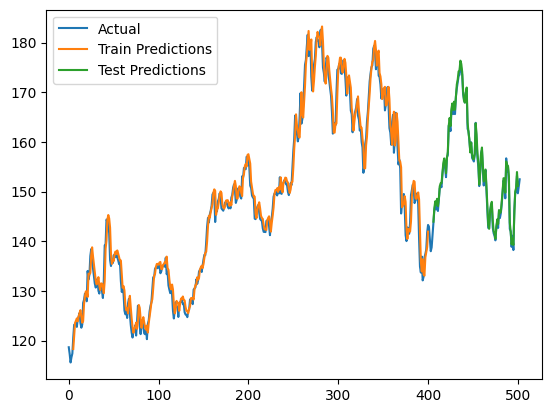

In [41]:
#sixth set with 2% probability
ds6 = df['High2'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0,1))
ds6 = scaler.fit_transform(ds6)

ds6_train_size = int(len(ds6) * .8)
ds6_test_size = len(ds6) - ds6_train_size
ds6_train, ds6_test = ds6[0:ds6_train_size,:], ds6[ds6_train_size:len(ds6),:]

ds6trainX, ds6trainY = toWindow(ds6_train, 5)
ds6testX, ds6testY = toWindow(ds6_test, 5)

ds6trainX = np.reshape(ds6trainX, (ds6trainX.shape[0], 1, ds6trainX.shape[1]))
ds6testX = np.reshape(ds6testX, (ds6testX.shape[0], 1, ds6testX.shape[1]))

ds6model = Sequential()
ds6model.add(LSTM(64, input_shape=(None,5)))
ds6model.add(Dense(32, activation='relu'))
ds6model.add(Dense(1))
ds6model.compile(loss='mean_squared_error', optimizer='adam')
ds6model.summary()

ds6model.fit(ds6trainX, ds6trainY, validation_data=(ds6testX, ds6testY), epochs=100)

ds6trainPredict = ds6model.predict(ds6trainX)
ds6testPredict = ds6model.predict(ds6testX)

ds6trainPredict = scaler.inverse_transform(ds6trainPredict)
ds6trainY = scaler.inverse_transform([ds6trainY])
ds6testPredict = scaler.inverse_transform(ds6testPredict)
ds6testY = scaler.inverse_transform([ds6testY])
ds6 = scaler.inverse_transform(ds6)

ds6trainScore = math.sqrt(mean_squared_error(ds6trainY[0], ds6trainPredict[:,0]))

ds6testScore = math.sqrt(mean_squared_error(ds6testY[0], ds6testPredict[:,0]))

print(ds6trainScore)
print(ds6testScore)

ds6trainPredictPlot = np.empty_like(ds6)
ds6trainPredictPlot[:,:] = np.nan
ds6trainPredictPlot[5:len(ds6trainPredict)+5, :] = ds6trainPredict

ds6testPredictPlot = np.empty_like(ds6)
ds6testPredictPlot[:,:] = np.nan
ds6testPredictPlot[len(ds6trainPredict) + (10): len(ds6) -2, :] = ds6testPredict

plt.plot(ds6)
plt.plot(ds6trainPredictPlot)
plt.plot(ds6testPredictPlot)
plt.legend(['Actual', 'Train Predictions', 'Test Predictions'])

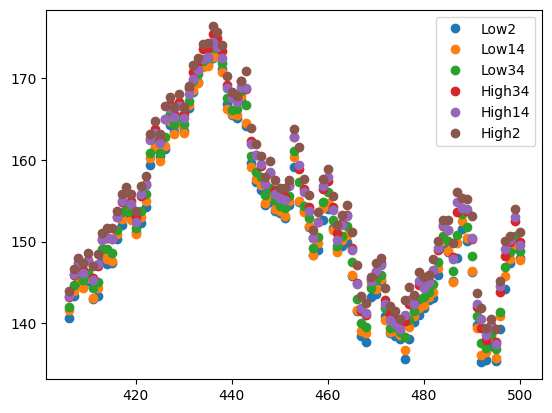

In [42]:
#testing segment with each uncertain world plotted
plt.plot(ds1testPredictPlot, 'o')
plt.plot(ds2testPredictPlot, 'o')
plt.plot(ds3testPredictPlot, 'o')
plt.plot(ds4testPredictPlot, 'o')
plt.plot(ds5testPredictPlot, 'o')
plt.plot(ds6testPredictPlot, 'o')
plt.legend(['Low2', 'Low14', 'Low34', 'High34', 'High14', 'High2'])

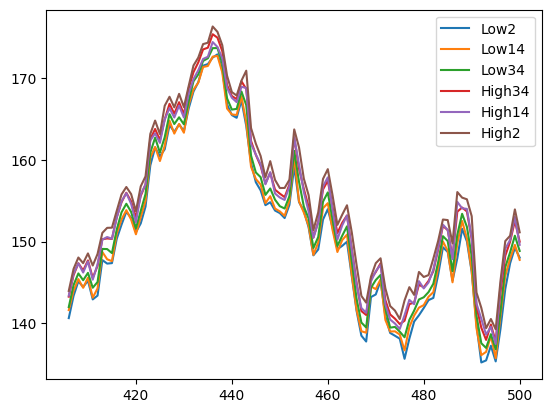

In [43]:
#testing segment with each uncertain world plotted
plt.plot(ds1testPredictPlot)
plt.plot(ds2testPredictPlot)
plt.plot(ds3testPredictPlot)
plt.plot(ds4testPredictPlot)
plt.plot(ds5testPredictPlot)
plt.plot(ds6testPredictPlot)
plt.legend(['Low2', 'Low14', 'Low34', 'High34', 'High14', 'High2'])

In [44]:
#RMSE in one place
ds1trainScore = math.sqrt(mean_squared_error(ds1trainY[0], ds1trainPredict[:,0]))
ds1testScore = math.sqrt(mean_squared_error(ds1testY[0], ds1testPredict[:,0]))
print('DS1 Training RMSE: ',ds1trainScore)
print('DS1 Testing RMSE: ', ds1testScore)

ds2trainScore = math.sqrt(mean_squared_error(ds2trainY[0], ds2trainPredict[:,0]))
ds2testScore = math.sqrt(mean_squared_error(ds2testY[0], ds2testPredict[:,0]))
print('DS2 Training RMSE: ',ds2trainScore)
print('DS2 Testing RMSE: ', ds2testScore)

ds3trainScore = math.sqrt(mean_squared_error(ds3trainY[0], ds3trainPredict[:,0]))
ds3testScore = math.sqrt(mean_squared_error(ds3testY[0], ds3testPredict[:,0]))
print('DS3 Training RMSE: ',ds3trainScore)
print('DS3 Testing RMSE: ', ds3testScore)

ds4trainScore = math.sqrt(mean_squared_error(ds4trainY[0], ds4trainPredict[:,0]))
ds4testScore = math.sqrt(mean_squared_error(ds4testY[0], ds4testPredict[:,0]))
print('DS4 Training RMSE: ',ds4trainScore)
print('DS4 Testing RMSE: ', ds4testScore)

ds5trainScore = math.sqrt(mean_squared_error(ds5trainY[0], ds5trainPredict[:,0]))
ds5testScore = math.sqrt(mean_squared_error(ds5testY[0], ds5testPredict[:,0]))
print('DS5 Training RMSE: ',ds5trainScore)
print('DS5 Testing RMSE: ', ds5testScore)

ds6trainScore = math.sqrt(mean_squared_error(ds6trainY[0], ds6trainPredict[:,0]))
ds6testScore = math.sqrt(mean_squared_error(ds6testY[0], ds6testPredict[:,0]))
print('DS6 Training RMSE: ',ds6trainScore)
print('DS6 Testing RMSE: ', ds6testScore)


DS1 Training RMSE:  2.4485483885018464
DS1 Testing RMSE:  2.8014343471038323
DS2 Training RMSE:  2.338325977521545
DS2 Testing RMSE:  2.66228354415072
DS3 Training RMSE:  2.313937328307879
DS3 Testing RMSE:  2.7195228889875414
DS4 Training RMSE:  2.340746391845914
DS4 Testing RMSE:  2.8112622311318147
DS5 Training RMSE:  2.246416091756515
DS5 Testing RMSE:  2.815973420644805
DS6 Training RMSE:  2.4033360000043618
DS6 Testing RMSE:  3.0403080461807828
